# Table of Contents
* [Comparison of Hi-C experiments](#Comparison-of-Hi-C-experiments)
	* [Between conditions](#Between-conditions)
		* [HindIII](#HindIII)
		* [NcoI](#NcoI)
	* [Between replicates with different restriction enzymes](#Between-replicates-with-different-restriction-enzymes)
		* [T0](#T0)
		* [T60](#T60)
* [Merge Hi-C experiments](#Merge-Hi-C-experiments)
	* [Normalizing merged data](#Normalizing-merged-data)


# Comparison of Hi-C experiments

## Some settings

In [15]:
from pytadbit.mapping.analyze import eig_correlate_matrices, correlate_matrices
from pytadbit import load_hic_data_from_reads
from cPickle import load
from matplotlib import pyplot as plt

In [21]:
reso = 100000
base_path = 'results/{0}/03_filtering/valid_reads12_{0}.tsv'
bias_ice_path = 'results/{1}/04_normalizing/biases_{0}_{1}.pick'
bias_dry_path = 'results/{1}/04_normalizing/biases_dryhic_{0}_{1}.tsv'
bads_path = 'results/{1}/04_normalizing/bad_columns_{0}_{1}.pick'

Write a little function to load HiCData obeject

In [34]:
def my_load_hic_data(renz, reso, which='ice'):
    hic_data = load_hic_data_from_reads(base_path.format(renz), resolution=reso)
    if which=='ice':
        hic_data.bias = load(open(bias_ice_path.format(reso, renz)))
    else:
        hic_data.bias = dict([(int(l.split()[0]), float(l.split()[1])) 
                              for l in open(bias_dry_path.format(reso, renz))])
    hic_data.bads = load(open(bads_path.format(reso, renz)))
    return hic_data

In [18]:
renz1 = 'HindIII'
renz2 = 'MboI'

## Load data

### ICE normalized

In [19]:
hic_data1_ice = my_load_hic_data(renz1, reso, which='ice')
hic_data2_ice = my_load_hic_data(renz2, reso, which='ice')

### DRY normalized

In [35]:
hic_data1_dry = my_load_hic_data(renz1, reso, which='dry')
hic_data2_dry = my_load_hic_data(renz2, reso, which='dry')

In [ ]:
%matplotlib inline

## Plot correlations

### ICE

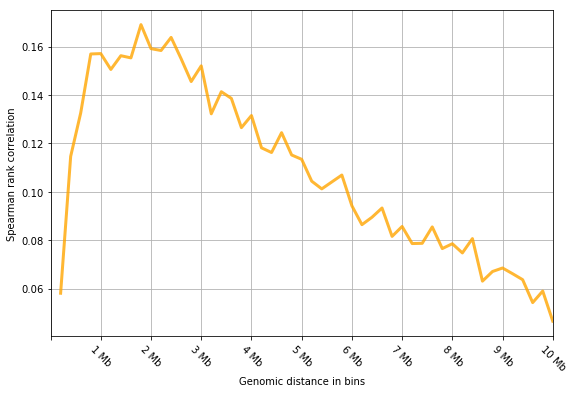

In [27]:
## this part is to "tune" the plot ##
plt.figure(figsize=(9, 6))
axe = plt.subplot()
axe.grid()
axe.set_xticks(range(0, 55, 5))
axe.set_xticklabels(['%d Mb' % int(i * 0.2) if i else '' for i in range(0, 55, 5)], rotation=-45)
#####################################

_ = correlate_matrices(hic_data1_ice, hic_data2_ice, max_dist=50, show=False, axe=axe, normalized=True)

### DRY

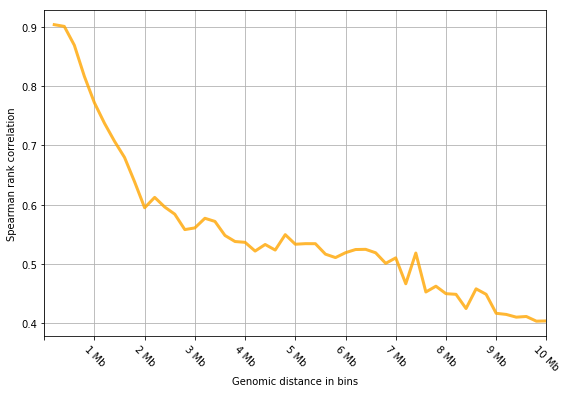

In [36]:
## this part is to "tune" the plot ##
plt.figure(figsize=(9, 6))
axe = plt.subplot()
axe.grid()
axe.set_xticks(range(0, 55, 5))
axe.set_xticklabels(['%d Mb' % int(i * 0.2) if i else '' for i in range(0, 55, 5)], rotation=-45)
#####################################

_ = correlate_matrices(hic_data1_dry, hic_data2_dry, max_dist=50, show=False, axe=axe, normalized=True)

## Repeat at 1 Mb resolution


In [28]:
reso = 1000000
hic_data1_ice = my_load_hic_data(renz1, reso, which='ice')
hic_data2_ice = my_load_hic_data(renz2, reso, which='ice')
hic_data1_dry = my_load_hic_data(renz1, reso, which='dry')
hic_data2_dry = my_load_hic_data(renz2, reso, which='dry')

### ICE

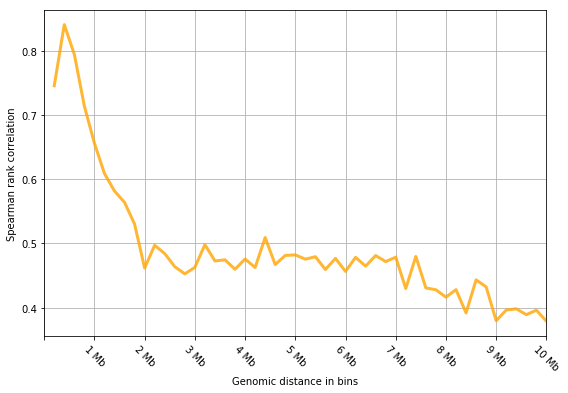

In [29]:
## this part is to "tune" the plot ##
plt.figure(figsize=(9, 6))
axe = plt.subplot()
axe.grid()
axe.set_xticks(range(0, 55, 5))
axe.set_xticklabels(['%d Mb' % int(i * 0.2) if i else '' for i in range(0, 55, 5)], rotation=-45)
#####################################

_ = correlate_matrices(hic_data1_ice, hic_data2_ice, max_dist=50, show=False, axe=axe, normalized=True)

### DRY

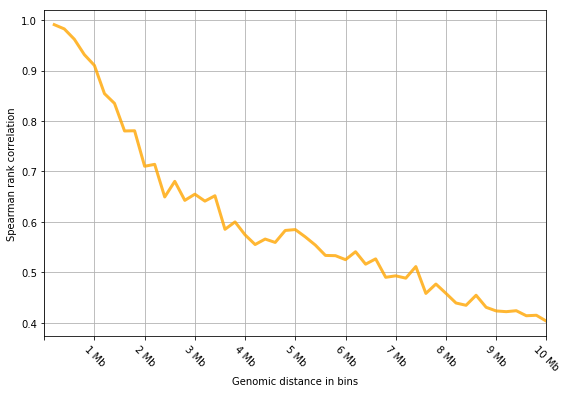

In [30]:
## this part is to "tune" the plot ##
plt.figure(figsize=(9, 6))
axe = plt.subplot()
axe.grid()
axe.set_xticks(range(0, 55, 5))
axe.set_xticklabels(['%d Mb' % int(i * 0.2) if i else '' for i in range(0, 55, 5)], rotation=-45)
#####################################

_ = correlate_matrices(hic_data1_dry, hic_data2_dry, max_dist=50, show=False, axe=axe, normalized=True)

## Compare eigenvectors

### ICE

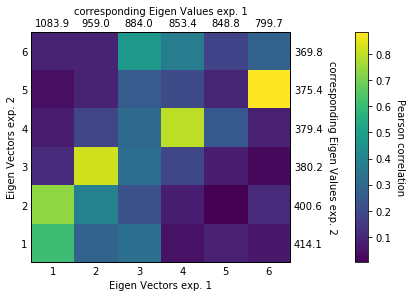

0.613 0.282 0.326 0.045 0.085 0.064

0.740 0.391 0.222 0.077 0.002 0.109

0.109 0.821 0.323 0.191 0.069 0.024

0.068 0.187 0.308 0.797 0.244 0.084

0.037 0.087 0.257 0.206 0.095 0.885

0.092 0.086 0.472 0.374 0.179 0.285



In [31]:
corrs = eig_correlate_matrices(hic_data1_ice, hic_data2_ice, show=True, aspect='auto', normalized=True)

for cor in corrs:
    print ' '.join(['%5.3f' % (c) for c in cor]) + '\n'

### DRY

In [33]:
hic_data1_dry.bias = [for b in hic_data1_dry.bias]

0

In [32]:
corrs = eig_correlate_matrices(hic_data1_dry, hic_data2_dry, show=True, aspect='auto', normalized=True)

for cor in corrs:
    print ' '.join(['%5.3f' % (c) for c in cor]) + '\n'

ZeroDivisionError: float division by zero

# Merge Hi-C experiments

Once agreed that experiments are similar, they can be merged.

Here is a simple way to merge valid pairs. Arguably we may want to merge unfiltered data but the difference would be minimal specially with non-replicates.

In [34]:
from pytadbit.mapping import merge_2d_beds

In [36]:
! mkdir -p results/fragment/both_T0/
! mkdir -p results/fragment/both_T60/
! mkdir -p results/fragment/both_T0/03_filtering/
! mkdir -p results/fragment/both_T60/03_filtering/

In [37]:
renz1 = 'HindIII'
renz2 = 'NcoI'
rep   = 'T60'

hic_data1 = 'results/fragment/{0}_{1}/03_filtering/valid_reads12_{0}_{1}.tsv'.format(renz1, rep)
hic_data2 = 'results/fragment/{0}_{1}/03_filtering/valid_reads12_{0}_{1}.tsv'.format(renz2, rep)
hic_data  = 'results/fragment/both_{0}/03_filtering/valid_reads12_{0}.tsv'.format(rep)

merge_2d_beds(hic_data1, hic_data2, hic_data)

13646392

In [38]:
renz1 = 'HindIII'
renz2 = 'NcoI'
rep   = 'T0'

hic_data1 = 'results/fragment/{0}_{1}/03_filtering/valid_reads12_{0}_{1}.tsv'.format(renz1, rep)
hic_data2 = 'results/fragment/{0}_{1}/03_filtering/valid_reads12_{0}_{1}.tsv'.format(renz2, rep)
hic_data  = 'results/fragment/both_{0}/03_filtering/valid_reads12_{0}.tsv'.format(rep)

merge_2d_beds(hic_data1, hic_data2, hic_data)

14830146

## Normalizing merged data

In [44]:
from pytadbit.mapping.analyze import hic_map
from cPickle import dump

In [39]:
! mkdir -p results/fragment/both_T0/04_normalizing
! mkdir -p results/fragment/both_T60/04_normalizing

All in one loop to:
 - filter
 - normalize
 - generate intra-chromosome and genomic matrices

all at diferent resolutions, and for both time points

In [ ]:
for rep in ['T0', 'T60']:
    print ' -', rep
    for reso in [1000000, 300000, 100000]:
        print '   *', reso
        # load hic_data
        hic_data = load_hic_data_from_reads(
            'results/fragment/both_{0}/03_filtering/valid_reads12_{0}.tsv'.format(rep),
            reso)
        # filter columns
        hic_data.filter_columns(draw_hist=False, min_count=10, by_mean=True)
        # normalize
        hic_data.normalize_hic(iterations=0)
        # save biases to reconstruct normalization
        out = open('results/fragment/both_{1}/04_normalizing/biases_{0}_{1}.pick'.format(reso, rep), 'w')
        dump(hic_data.bias, out)
        out.close()
        # save filtered out columns
        out = open('results/fragment/both_{1}/04_normalizing/bad_columns_{0}_{1}.pick'.format(reso, rep), 'w')
        dump(hic_data.bads, out)
        out.close()
        # save data as raw matrix per chromsome
        hic_map(hic_data, by_chrom='intra', normalized=False,
                savedata='results/fragment/both_{1}/04_normalizing/{0}_raw'.format(reso, rep))
        # save data as normalized matrix per chromosome
        hic_map(hic_data, by_chrom='intra', normalized=True,
                savedata='results/fragment/both_{1}/04_normalizing/{0}_norm'.format(reso, rep))
        # if the resolution is low save the full genomic matrix
        if reso > 500000:
            hic_map(hic_data, by_chrom=False, normalized=False, 
                    savefig ='results/fragment/both_{1}/04_normalizing/{0}_raw.png'.format(reso, rep),
                    savedata='results/fragment/both_{1}/04_normalizing/{0}_raw.mat'.format(reso, rep))

            hic_map(hic_data, by_chrom=False, normalized=True,
                    savefig ='results/fragment/both_{1}/04_normalizing/{0}_norm.png'.format(reso, rep) ,
                    savedata='results/fragment/both_{1}/04_normalizing/{0}_norm.mat'.format(reso, rep))


   124   127   128   129   130   131   132   133   134   135   136   137   138   139   140   141   142   143   742   931
   932  1095  1295  1586  1587  1588  1589  1590  1591  1592  1593  1594  1595  1596  1597  1598  1599  1600  1601  1721
  1866  1867  1868  2085  2086  2087  2088  2089  2090  2091  2092  2093  2094  2095  2096  2097  2098  2099  2100  2101
  2102  2200  2201  2202  2203  2204  2205  2206  2207  2208  2209  2210  2211  2212  2213  2214  2215  2217  2293  2307
  2308  2309  2310  2311  2312  2313  2314  2315  2316  2317  2318  2319  2320  2321  2322  2323  2324  2447  2448  2449
  2450  2451  2452  2453  2454  2455  2601  2602  2603  2604  2691  2692  2752  2790  2791  2792  2793  2794  2801  2837
  2838  2839  2840  2841  2842  2843  2844  2845  2846  2850  2851  2888  2889  2947  2948  2949  3044  3045  3046  3047
  3067  3068  3069  3072  3073  3074  3075  3076  3077  3078  3079  3080  3081  3082  3083  3084  3085  3086  3087  3088
  3089  3090  3091  3092  3093 

 - T0
   * 1000000
Found 245 of 3102 columns with poor signal
iterative correction
  - copying matrix
  - computing baises
rescaling to factor 1
   *


    44   403   410   411   412   413   414   415   419   420   421   422   423   424   425   426   427   428   429   430
   431   432   433   434   435   436   437   438   439   440   441   442   443   444   445   446   447   448   449   450
   451   452   453   454   455   456   457   458   459   460   461   462   463   464   465   466   467   468   469   470
   471   472   473   474   475   476   477   702   811   812   819  1128  1133  1134  1518  1608  1637  2466  2467  2468
  2469  2470  2471  2934  3093  3094  3095  3096  3097  3098  3099  3100  3101  3540  3637  3638  3639  3641  3642  3643
  3644  3646  3647  3648  3650  3651  3736  3737  3739  3740  3967  3968  4110  4305  4306  4307  4308  4309  4310  4311
  4312  4313  4646  4648  4668  5272  5273  5274  5275  5276  5277  5278  5279  5280  5281  5282  5283  5284  5285  5286
  5287  5288  5289  5290  5291  5292  5293  5294  5295  5296  5297  5298  5299  5300  5301  5302  5303  5304  5305  5306
  5307  5308  5309  5310  5311 

 300000
Found 1006 of 10306 columns with poor signal
iterative correction
  - copying matrix
  - computing baises
rescaling to factor 1
   *